In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# import data
aggregation_data = pd.read_csv("../data/processed/aggregation_data.csv", sep="\t")
filter_agg_data = pd.read_csv("../data/processed/filter_agg_data.csv", sep="\t")
srcip_dstip_data = pd.read_csv("../data/processed/join_srcip_dstip_data.csv", sep="\t")
payload_size_data = pd.read_csv("../data/processed/window_func_data.csv", sep="\t")



In [29]:
aggregation_data.columns = ["attack_cat", "avg_dur", "avg_sbytes", "avg_dbytes"]
filter_agg_data.columns = ["proto", "attack_count"]
# srcip_dstip_data.columns = ['srcip', 'dstip', 'connection_count']
payload_size_data.columns = ['srcip', 'dstip', 'sload', 'dload', 'prev_sload']


In [7]:
aggregation_data

,attack_cat,avg_dur,avg_sbytes,avg_dbytes
0,,0.648492,4121.598472,41064.219525
1,Backdoor,2.612264,1803.989415,335.334819
2,Exploits,2.122902,29655.004065,17748.041909
3,Reconnaissance,1.005046,751.381283,1797.089226
4,Backdoors,0.921315,569.149813,160.700375
5,DoS,2.448795,18360.793799,21747.133737
6,Shellcode,0.362856,532.835208,146.399735
7,Analysis,1.416942,839.645125,296.184535
8,Fuzzers,2.673938,6764.302648,518.772127
9,Generic,0.053270,356.961983,1067.219439


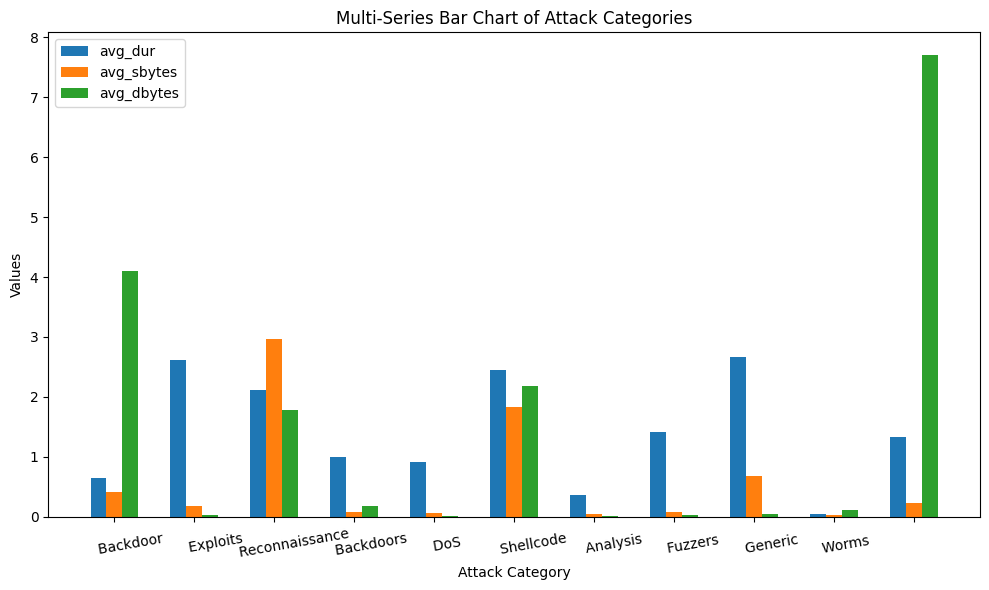

In [41]:
# Plot Aggregation data
categories = aggregation_data["attack_cat"]
bar_width = 0.2
index = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10,6))

bar1 = ax.bar(index, aggregation_data["avg_dur"], bar_width, label="avg_dur")
bar2 = ax.bar(index + bar_width, aggregation_data["avg_sbytes"]/10000, bar_width, label="avg_sbytes")
bar1 = ax.bar(index + 2*bar_width, aggregation_data["avg_dbytes"]/10000, bar_width, label="avg_dbytes")

ax.set_xlabel('Attack Category')
ax.set_ylabel('Values')
ax.set_title('Multi-Series Bar Chart of Attack Categories')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(categories, rotation=10, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
filter_agg_data

,proto,attack_count
0,udp,223750
1,tcp,58184
2,unas,16202
3,ospf,3278
4,sctp,1525
5,any,411
6,gre,324
7,rsvp,274
8,ipv6,272
9,sun-nd,262


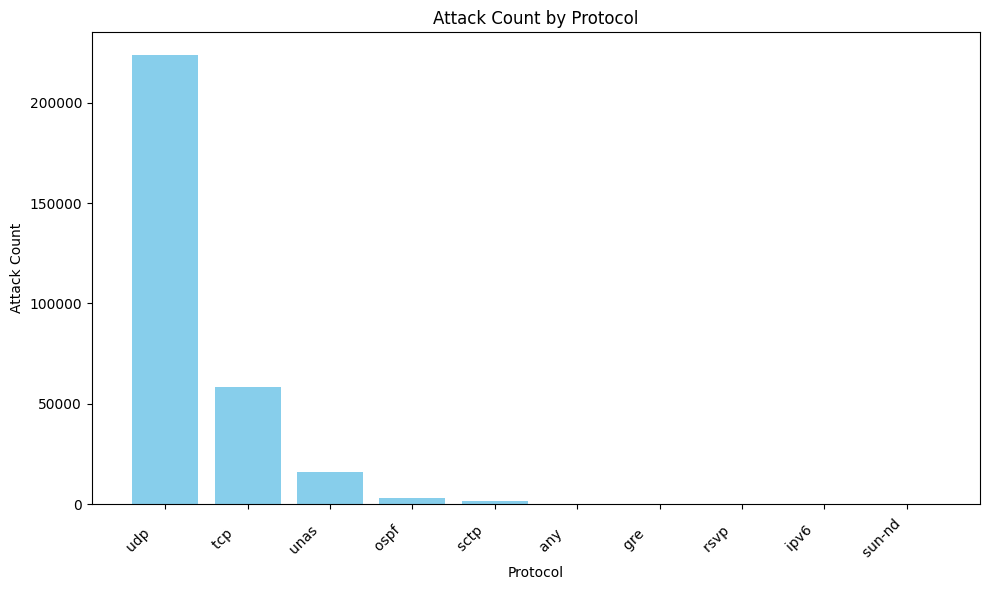

In [20]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
ax.bar(filter_agg_data["proto"], filter_agg_data["attack_count"], color='skyblue')

# Add labels, title, and adjust x-ticks for readability
ax.set_xlabel('Protocol')
ax.set_ylabel('Attack Count')
ax.set_title('Attack Count by Protocol')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
srcip_dstip_data

,srcip,dstip,connection_count
0,149.171.126.18,175.45.176.3,5027765612
1,175.45.176.3,149.171.126.18,4222390032
2,175.45.176.3,149.171.126.15,4005799560
3,175.45.176.1,149.171.126.18,3913790292
4,149.171.126.18,175.45.176.1,3383141450
5,175.45.176.1,149.171.126.14,2665697634
6,149.171.126.15,175.45.176.3,2284888287
7,149.171.126.14,175.45.176.1,1867076280
8,175.45.176.0,149.171.126.10,1439987034
9,149.171.126.10,175.45.176.0,1337556822


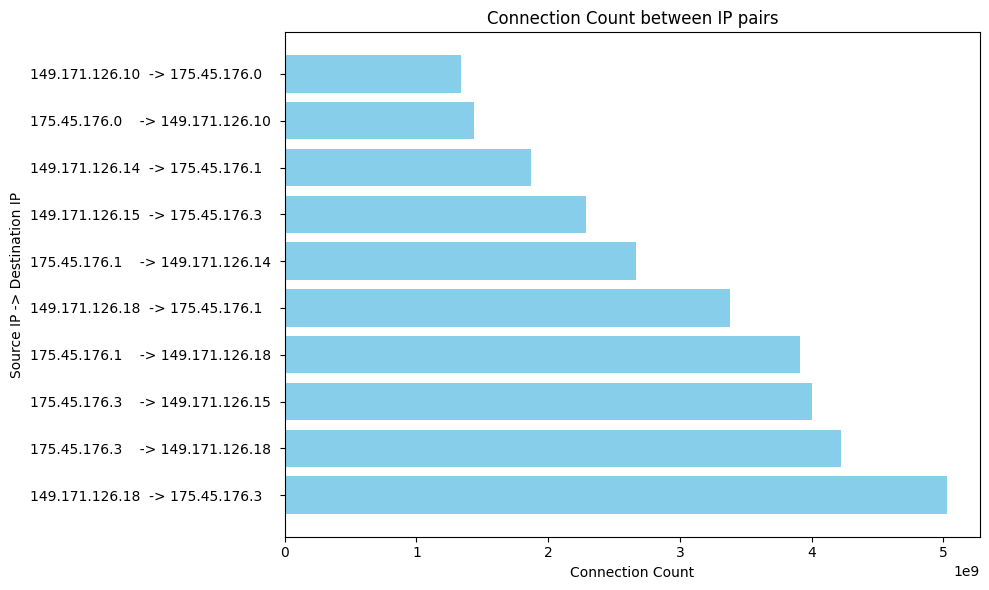

In [25]:
# Create a new column with combined srcip and dstip for labeling
srcip_dstip_data['connection'] = srcip_dstip_data['srcip'] + ' -> ' + srcip_dstip_data['dstip']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart
ax.barh(srcip_dstip_data['connection'], srcip_dstip_data['connection_count'], color='skyblue')

# Add labels and title
ax.set_xlabel('Connection Count')
ax.set_ylabel('Source IP -> Destination IP')
ax.set_title('Connection Count between IP pairs')

# Display the plot
plt.tight_layout()
plt.show()

In [30]:
payload_size_data

,srcip,dstip,sload,dload,prev_sload
0,175.45.176.1,149.171.126.13,5.988000e+09,0.0,6.720000e+08
1,175.45.176.0,149.171.126.17,5.640000e+09,0.0,3.869470e+03
2,175.45.176.2,149.171.126.11,5.600000e+09,0.0,4.838712e+03
3,175.45.176.1,149.171.126.17,5.468000e+09,0.0,1.050176e+03
4,175.45.176.3,149.171.126.14,5.344000e+09,0.0,2.933333e+08
5,175.45.176.1,149.171.126.11,5.280000e+09,0.0,1.349681e+04
6,175.45.176.3,149.171.126.16,5.268000e+09,0.0,5.268000e+09
7,175.45.176.3,149.171.126.16,5.268000e+09,0.0,5.268000e+09
8,175.45.176.3,149.171.126.16,5.268000e+09,0.0,5.268000e+09
9,175.45.176.3,149.171.126.16,5.268000e+09,0.0,5.268000e+09


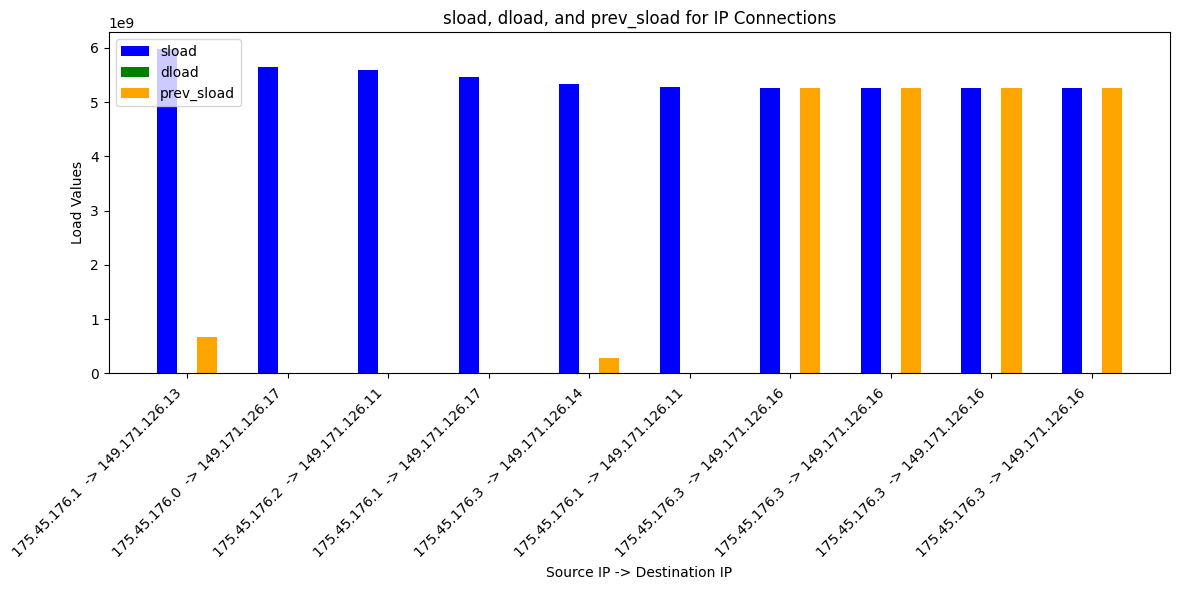

In [33]:
# Create a new column with combined srcip and dstip for labeling
payload_size_data['connection'] = payload_size_data['srcip'] + ' -> ' + payload_size_data['dstip']

# Define the number of groups and bar width
bar_width = 0.2
index = range(len(payload_size_data))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each series as grouped bars
bar1 = ax.bar([i - bar_width for i in index], payload_size_data['sload'], bar_width, label='sload', color='blue')
bar2 = ax.bar(index, payload_size_data['dload'], bar_width, label='dload', color='green')
bar3 = ax.bar([i + bar_width for i in index], payload_size_data['prev_sload'], bar_width, label='prev_sload', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Source IP -> Destination IP')
ax.set_ylabel('Load Values')
ax.set_title('sload, dload, and prev_sload for IP Connections')
ax.set_xticks(index)
ax.set_xticklabels(payload_size_data['connection'], rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
